In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)

In [3]:
data_folder = "./data"

year = 2020
so_survey_results_2020 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2020 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2019
so_survey_results_2019 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2019 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2018
so_survey_results_2018 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2018 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2017
so_survey_results_2017 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2017 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"

# Getting a quick look at the 2017 data

In [4]:
df_2017 = pd.read_csv(so_survey_results_2017)
print(df_2017.shape)

(51392, 154)


In [5]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_2017.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [181]:
df_2017.Country.value_counts()

United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
                                  ...  
Mali                                  1
Falkland Islands                      1
British Indian Ocean Territory        1
Vatican City State                    1
Northern Mariana Islands              1
Name: Country, Length: 201, dtype: int64

In [8]:
df_2017_es = df_2017[df_2017.Country == "Spain"]

In [9]:
df_2017_es.shape

(864, 154)

In [10]:
df_2017_schema = pd.read_csv(so_survey_schema_2017)
df_2017_schema.shape

(154, 2)

In [11]:
df_2017_schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [12]:
df_2017_es.dtypes

Respondent                            int64
Professional                         object
ProgramHobby                         object
Country                              object
University                           object
EmploymentStatus                     object
FormalEducation                      object
MajorUndergrad                       object
HomeRemote                           object
CompanySize                          object
CompanyType                          object
YearsProgram                         object
YearsCodedJob                        object
YearsCodedJobPast                    object
DeveloperType                        object
WebDeveloperType                     object
MobileDeveloperType                  object
NonDeveloperType                     object
CareerSatisfaction                  float64
JobSatisfaction                     float64
ExCoderReturn                        object
ExCoderNotForMe                      object
ExCoderBalance                  

In [13]:
df_2017_es['Year'] = 2017

/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Process categorical data

In [247]:
def process_and_plot_multiple_tags_cat_col(df, column_name, plot_title, missing_method="dropna"):
    null_entries = len(df[df[column_name].isnull()])
    print(f"null entries for {column_name}: {null_entries}")
    if null_entries > 0.0:
        # we can drop or add missing values at this point
        if missing_method == "fill_mode":
            col_mode = df[column_name].mode()[0]
            print(f"replacing nulls with mode(most often value) of the column: {col_mode}")
            df[column_name].fillna(col_mode, inplace=True)
        elif missing_method == "dropna":
            print(f"droping nulls of the column: {column_name}")
            df.dropna(subset=[column_name], axis=0, inplace=True)
        null_entries = len(df[df[column_name].isnull()])
        print(f"updated null entries for {column_name}: {null_entries}")
    cat_vals_count = df[column_name].value_counts().reset_index()
    cat_vals_count.rename(columns={'index': 'catval', column_name: 'count'}, inplace=True)
    df_exploded = pd.concat([pd.Series(row['count'], row['catval'].split(';')) for _, row in cat_vals_count.iterrows()]).reset_index()
    df_exploded.rename(columns={"index": "catval", 0: "count"}, inplace=True)
    
    # remove extra spaces from categorical values
    df_exploded['catval'] = df_exploded['catval'].apply(lambda x: x.strip())
    
    df_exploded_grouped = df_exploded.groupby(['catval']).sum().sort_values(["count"], ascending=False).rename(columns={"count" : "total_catvals"}).reset_index()
    print(df_exploded_grouped)
    # plot proportion of cat vals types from total of respondents to the survey
    total_values = df.shape[0] - (null_entries if missing_method=="dropna" else 0)
    ax = (df_exploded_grouped["total_catvals"]/total_values).plot(kind="bar")
    plt.title(plot_title)
    ax.set_xticklabels(df_exploded_grouped["catval"])
    plt.show()
    return df_exploded_grouped, total_values

null entries for DeveloperType: 0
                                               catval  total_catvals
0                                       Web developer          41502
1                      Desktop applications developer          10435
2                                    Mobile developer           8326
3                              Database administrator           5192
4   Developer with a statistics or mathematics bac...           4091
5                               Systems administrator           4086
6                                   DevOps specialist           4015
7             Embedded applications/devices developer           3352
8                                      Data scientist           3045
9                                               Other           2694
10                               Graphics programming           1731
11                                   Graphic designer           1426
12                        Machine learning specialist           1379


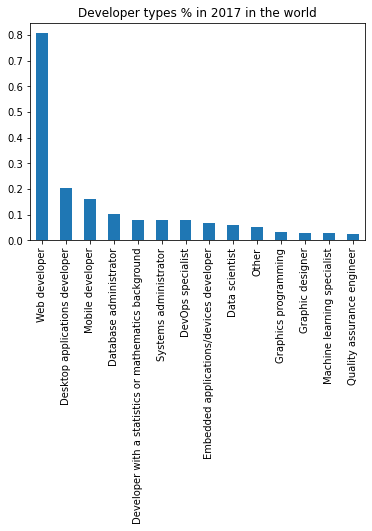

In [212]:
df_exploded_grouped_2017, total_vals_2017 = process_and_plot_multiple_tags_cat_col(df_2017, "DeveloperType", 
                                                                                   "Developer types % in 2017 in the world")

null entries for DeveloperType: 0
                                               catval  total_catvals
0                                       Web developer            699
1                      Desktop applications developer            190
2                                    Mobile developer            183
3                              Database administrator             97
4                               Systems administrator             94
5                                      Data scientist             63
6                                   DevOps specialist             58
7   Developer with a statistics or mathematics bac...             51
8             Embedded applications/devices developer             51
9                                Graphics programming             42
10                                              Other             42
11                                   Graphic designer             32
12                        Machine learning specialist             22


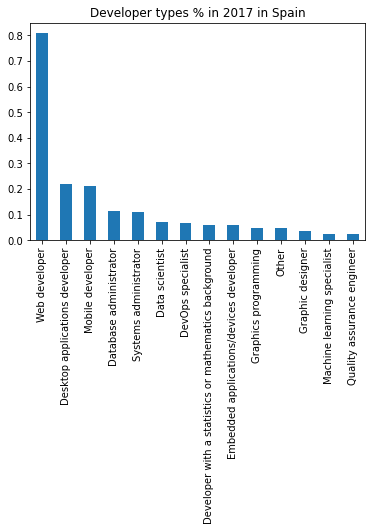

In [213]:
df_exploded_grouped_2017_es, total_vals_2017_es = process_and_plot_multiple_tags_cat_col(df_2017_es, "DeveloperType", "Developer types % in 2017 in Spain")

In [240]:
def compare_and_plot_df(df, df_country_specific, country, year, rows_year, rows_country_year):
    merged_df = pd.DataFrame()
    merged_df["catval"] = df["catval"]
    merged_df[f"{year}"] = df["total_catvals"]/rows_year
    merged_df[f"{country} {year}"] = df_country_specific["total_catvals"]/rows_country_year
    merged_df["diff"] = merged_df[f"{year}"] - merged_df[f"{country} {year}"]
    print(merged_df)
    
    merged_df.style.bar(subset=['diff'], align='mid', color=['#d65f5f', '#5fba7d'])
    
    labels = merged_df["catval"]
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, merged_df[f"{year}"], width, label=f"{year}")
    rects2 = ax.bar(x + width/2, merged_df[f"{country} {year}"] , width, label=f"{country} {year}")

#     ax.set_ylabel('')
#     ax.set_title('')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90)
    ax.legend()

                                               catval      2017  Spain 2017  \
0                                       Web developer  0.807558    0.809028   
1                      Desktop applications developer  0.203047    0.219907   
2                                    Mobile developer  0.162010    0.211806   
3                              Database administrator  0.101027    0.112269   
4   Developer with a statistics or mathematics bac...  0.079604    0.108796   
5                               Systems administrator  0.079507    0.072917   
6                                   DevOps specialist  0.078125    0.067130   
7             Embedded applications/devices developer  0.065224    0.059028   
8                                      Data scientist  0.059250    0.059028   
9                                               Other  0.052421    0.048611   
10                               Graphics programming  0.033682    0.048611   
11                                   Graphic designe

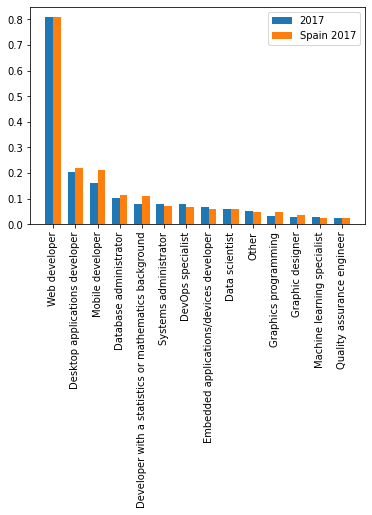

In [241]:
compare_and_plot_df(df_exploded_grouped_2017, df_exploded_grouped_2017_es, "Spain", 2017, total_vals_2017, total_vals_2017_es)

In [252]:
def process_and_compare_col_global_local(df, df_country, column_name, year, country):
    print(f"processing yearly data for year {year} and {column_name}")
    df_exploded_grouped, total_vals = process_and_plot_multiple_tags_cat_col(df, column_name, f"{column_name} % in {year} in the world")
    print(f"processing yearly data for year {year} and {column_name} in {country}")
    df_exploded_grouped__country_specific, total_vals_country = process_and_plot_multiple_tags_cat_col(df_country, column_name, f"{column_name} % in {year} in {country}")
    compare_and_plot_df(df_exploded_grouped, df_exploded_grouped__country_specific, country, year, total_vals, total_vals_country)

processing yearly data for year 2017 and HaveWorkedLanguage
null entries for HaveWorkedLanguage: 0
            catval  total_catvals
0       JavaScript          37642
1              SQL          33521
2               C#          27243
3             Java          14524
4           Python          11704
5              PHP          10290
6              C++           8155
7                C           6974
8       TypeScript           3488
9             Ruby           3324
10           Swift           2368
11     Objective-C           2349
12          VB.NET           2273
13        Assembly           1823
14               R           1634
15            Perl           1585
16             VBA           1574
17          Matlab           1569
18              Go           1557
19           Scala           1309
20          Groovy           1193
21    CoffeeScript           1192
22  Visual Basic 6           1071
23             Lua           1039
24         Haskell            649
25              F

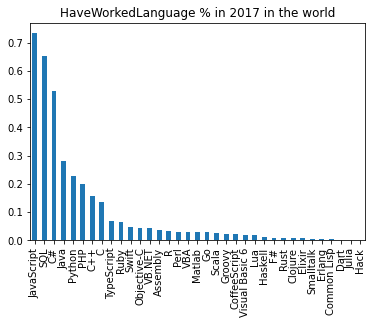

processing yearly data for year 2017 and HaveWorkedLanguage in Spain
null entries for HaveWorkedLanguage: 0
            catval  total_catvals
0       JavaScript            650
1              SQL            568
2             Java            545
3           Python            197
4              PHP            194
5               C#            141
6              C++            112
7                C            104
8       TypeScript             52
9             Ruby             44
10          VB.NET             35
11     Objective-C             34
12               R             29
13           Swift             29
14        Assembly             28
15              Go             27
16          Matlab             26
17            Perl             25
18  Visual Basic 6             25
19             VBA             23
20    CoffeeScript             20
21          Groovy             19
22           Scala             19
23             Lua             18
24         Haskell             14
25      

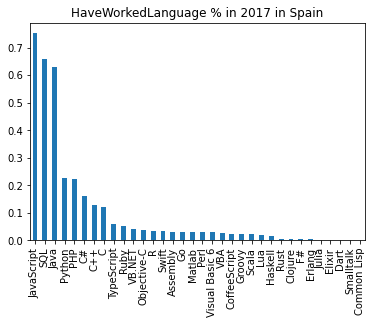

            catval      2017  Spain 2017      diff
0       JavaScript  0.732449    0.752315 -0.019866
1              SQL  0.652261    0.657407 -0.005146
2               C#  0.530102    0.630787 -0.100685
3             Java  0.282612    0.228009  0.054603
4           Python  0.227740    0.224537  0.003203
5              PHP  0.200226    0.163194  0.037031
6              C++  0.158682    0.129630  0.029053
7                C  0.135702    0.120370  0.015332
8       TypeScript  0.067870    0.060185  0.007685
9             Ruby  0.064679    0.050926  0.013753
10           Swift  0.046077    0.040509  0.005568
11     Objective-C  0.045708    0.039352  0.006356
12          VB.NET  0.044229    0.033565  0.010664
13        Assembly  0.035472    0.033565  0.001908
14               R  0.031795    0.032407 -0.000613
15            Perl  0.030841    0.031250 -0.000409
16             VBA  0.030627    0.030093  0.000535
17          Matlab  0.030530    0.028935  0.001595
18              Go  0.030297   

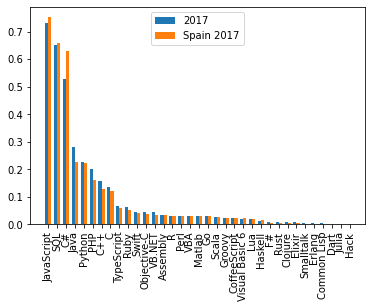

In [253]:
process_and_compare_col_global_local(df_2017, df_2017_es, "HaveWorkedLanguage", year=2017, country="Spain")

## Process Frameworks 

processing yearly data for year 2017 and HaveWorkedFramework
null entries for HaveWorkedFramework: 0
      catval  total_catvals
0  .NET Core          37926
1    Node.js           9522
2  AngularJS           8962
3      React           3953
4    Cordova           2232
5   Firebase           1979
6    Xamarin           1675
7     Hadoop           1148
8      Spark            953


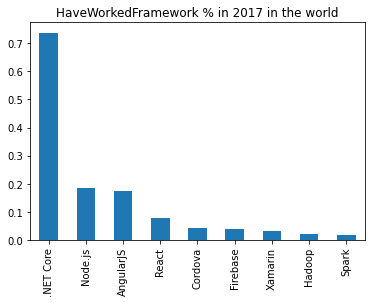

processing yearly data for year 2017 and HaveWorkedFramework in Spain
null entries for HaveWorkedFramework: 0
      catval  total_catvals
0  AngularJS            702
1    Node.js            157
2  .NET Core             78
3    Cordova             68
4      React             49
5   Firebase             32
6      Spark             25
7     Hadoop             23
8    Xamarin             18


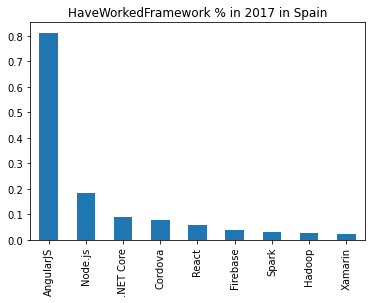

      catval      2017  Spain 2017      diff
0  .NET Core  0.737975    0.812500 -0.074525
1    Node.js  0.185282    0.181713  0.003569
2  AngularJS  0.174385    0.090278  0.084107
3      React  0.076919    0.078704 -0.001785
4    Cordova  0.043431    0.056713 -0.013282
5   Firebase  0.038508    0.037037  0.001471
6    Xamarin  0.032593    0.028935  0.003657
7     Hadoop  0.022338    0.026620 -0.004282
8      Spark  0.018544    0.020833 -0.002290


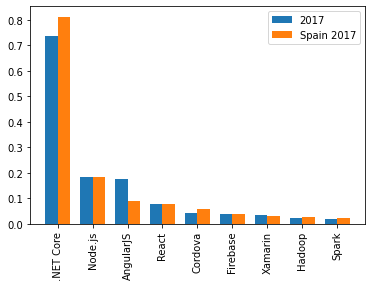

In [254]:
process_and_compare_col_global_local(df_2017, df_2017_es, "HaveWorkedFramework", year=2017, country="Spain")

# Process 2018 Data

In [203]:
def process_yearly_data(file_path, year, country, columns_index=None):
    print(f"processing data for year {year} from {file_path}")
    df = pd.read_csv(file_path)
    print('original data shape: ', df.shape)
    df['Year'] = year
    print('original data shape + year: ', df.shape)
    df_country_specific = df[df.Country == country]
    print('country specific data shape: ', df_country_specific.shape)
    if columns_index is not None:
        print('old column index: ', columns_index.tolist())
        print('old columns index len: ', len(columns_index))
        print('new columns index len: ', len(df_country_specific.columns))
        print('new column index: ', df_country_specific.columns.tolist())    
        diff_old_new = columns_index.difference(df_country_specific.columns)
        print('extra old columns index len: ', len(diff_old_new))
        print('extra old columns index ', diff_old_new.tolist())
        diff_new_old = df_country_specific.columns.difference(columns_index)
        print('extra new columns index len: ', len(diff_new_old))
        print('extra new columns index ', diff_new_old.tolist())
        new_column_index = columns_index.intersection(df_country_specific.columns)
        print('intersection columns index len: ', len(new_column_index))
        print('intersection columns index: ', new_column_index.tolist())


    return df, df_country_specific, new_column_index

In [204]:
cols_intersect = df_2017_es.columns

In [205]:
df_2018, df_2018_es, cols_intersect = process_yearly_data(so_survey_results_2018, 2018, 'Spain', cols_intersect)

processing data for year 2018 from ./data/developer_survey_2018/survey_results_public.csv


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


original data shape:  (98855, 129)
original data shape + year:  (98855, 130)
country specific data shape:  (1769, 130)
old column index:  ['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob

## Process Developer types in 2018

processing yearly data for year 2018 and DevType
null entries for DevType: 0
                                           catval  total_catvals
0                              Back-end developer          32613
1                            Full-stack developer          29882
2                             Front-end developer          22352
3                                Mobile developer          10293
4    Desktop or enterprise applications developer           9371
5                          Database administrator           7803
6                                         Student           7068
7                                        Designer           6540
8                               DevOps specialist           6352
9                            System administrator           6072
10  Data scientist or machine learning specialist           4256
11                       Data or business analyst           4112
12                           QA or test developer           3600
13           

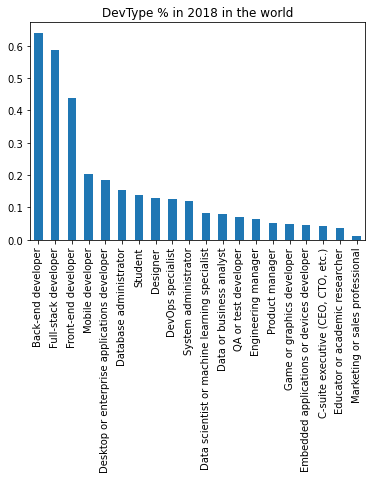

processing yearly data for year 2018 and DevType in Spain
null entries for DevType: 0
                                           catval  total_catvals
0                              Back-end developer            587
1                            Full-stack developer            524
2                             Front-end developer            390
3                                Mobile developer            204
4                          Database administrator            134
5    Desktop or enterprise applications developer            130
6                            System administrator            120
7                                         Student            111
8                               DevOps specialist            101
9                                        Designer             96
10  Data scientist or machine learning specialist             76
11                       Data or business analyst             76
12                           QA or test developer             72
13  

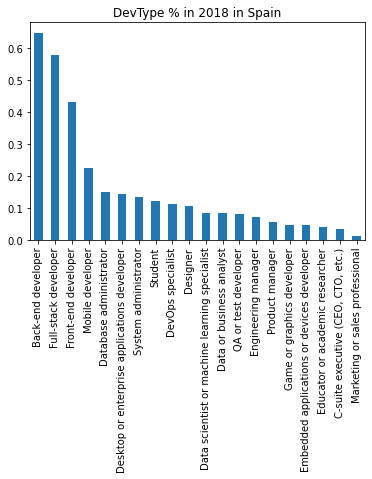

                                           catval      2018  Spain 2018  \
0                              Back-end developer  0.640035    0.647189   
1                            Full-stack developer  0.586439    0.577729   
2                             Front-end developer  0.438662    0.429989   
3                                Mobile developer  0.202002    0.224917   
4    Desktop or enterprise applications developer  0.183907    0.147740   
5                          Database administrator  0.153135    0.143330   
6                                         Student  0.138711    0.132304   
7                                        Designer  0.128349    0.122381   
8                               DevOps specialist  0.124659    0.111356   
9                            System administrator  0.119164    0.105843   
10  Data scientist or machine learning specialist  0.083525    0.083793   
11                       Data or business analyst  0.080699    0.083793   
12                       

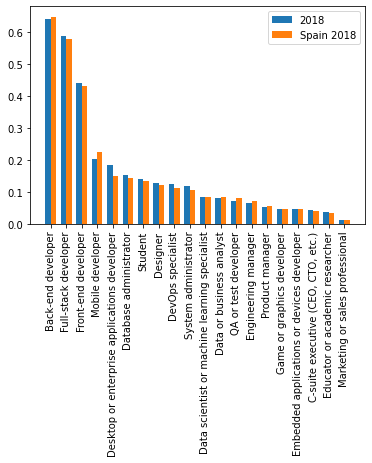

In [255]:
process_and_compare_col_global_local(df_2018, df_2018_es, "DevType", year=2018, country="Spain")

## Process Languages worked in 2018

processing yearly data for year 2018 and LanguageWorkedWith
null entries for LanguageWorkedWith: 0
                  catval  total_catvals
0             JavaScript          41353
1                   HTML          39006
2                    CSS          37642
3                    SQL          31603
4                   Java          24751
5             Bash/Shell          22201
6                 Python          20849
7                     C#          20467
8                    PHP          16214
9             TypeScript          12610
10                   C++          12010
11                     C          10783
12                  Ruby           5741
13                    Go           4214
14                 Swift           3899
15                VB.NET           3884
16              Assembly           3493
17           Objective-C           3357
18                     R           3109
19                Matlab           2914
20                 Scala           2806
21                Gro

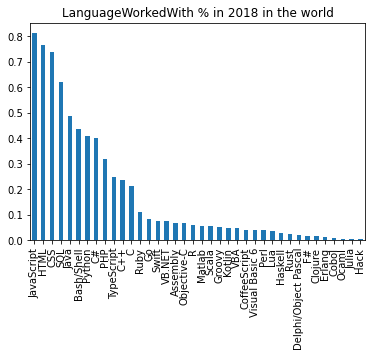

processing yearly data for year 2018 and LanguageWorkedWith in Spain
null entries for LanguageWorkedWith: 0
                  catval  total_catvals
0             JavaScript            739
1                   HTML            672
2                    CSS            643
3                    SQL            555
4                   Java            515
5             Bash/Shell            398
6                 Python            345
7                    PHP            331
8                     C#            280
9             TypeScript            194
10                   C++            169
11                     C            164
12                  Ruby             86
13                     R             72
14                VB.NET             68
15                 Swift             63
16                 Scala             58
17                Matlab             56
18           Objective-C             54
19              Assembly             53
20                    Go             52
21          

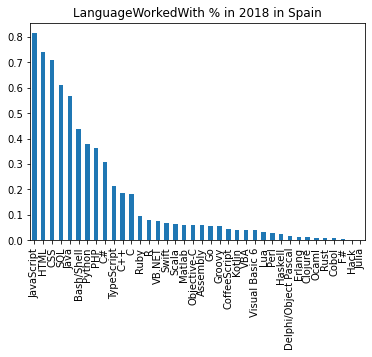

                  catval      2018  Spain 2018      diff
0             JavaScript  0.811559    0.814774 -0.003215
1                   HTML  0.765499    0.740904  0.024595
2                    CSS  0.738730    0.708931  0.029800
3                    SQL  0.620214    0.611907  0.008307
4                   Java  0.485742    0.567806 -0.082064
5             Bash/Shell  0.435698    0.438809 -0.003111
6                 Python  0.409165    0.380375  0.028790
7                     C#  0.401668    0.364939  0.036729
8                    PHP  0.318202    0.308710  0.009492
9             TypeScript  0.247473    0.213892  0.033581
10                   C++  0.235698    0.186329  0.049370
11                     C  0.211618    0.180816  0.030802
12                  Ruby  0.112668    0.094818  0.017850
13                    Go  0.082700    0.079383  0.003318
14                 Swift  0.076518    0.074972  0.001546
15                VB.NET  0.076224    0.069460  0.006764
16              Assembly  0.068

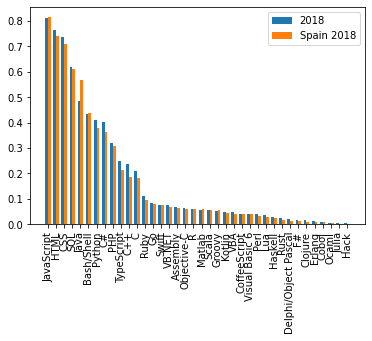

In [256]:
process_and_compare_col_global_local(df_2018, df_2018_es, "LanguageWorkedWith", year=2018, country="Spain")

## Process Framework worked in 2018

processing yearly data for year 2018 and FrameworkWorkedWith
null entries for FrameworkWorkedWith: 0
           catval  total_catvals
0         Node.js          25324
1         Angular          18873
2           React          14222
3       .NET Core          13850
4          Spring           8980
5          Django           6624
6         Cordova           4333
7      TensorFlow           3949
8         Xamarin           3735
9           Spark           2424
10         Hadoop           2395
11  Torch/PyTorch            837


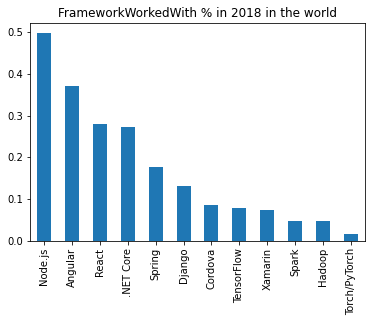

processing yearly data for year 2018 and FrameworkWorkedWith in Spain
null entries for FrameworkWorkedWith: 0
           catval  total_catvals
0         Node.js            429
1         Angular            351
2          Spring            226
3           React            200
4       .NET Core            170
5          Django            116
6         Cordova            109
7      TensorFlow             63
8           Spark             61
9         Xamarin             51
10         Hadoop             46
11  Torch/PyTorch             11


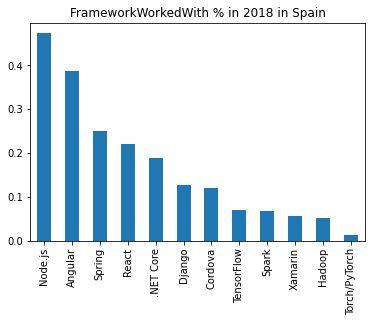

           catval      2018  Spain 2018      diff
0         Node.js  0.496988    0.472988  0.024000
1         Angular  0.370386    0.386990 -0.016604
2           React  0.279109    0.249173  0.029936
3       .NET Core  0.271808    0.220507  0.051301
4          Spring  0.176234    0.187431 -0.011197
5          Django  0.129997    0.127894  0.002103
6         Cordova  0.085036    0.120176 -0.035141
7      TensorFlow  0.077500    0.069460  0.008040
8         Xamarin  0.073300    0.067255  0.006045
9           Spark  0.047571    0.056229 -0.008658
10         Hadoop  0.047002    0.050717 -0.003714
11  Torch/PyTorch  0.016426    0.012128  0.004298


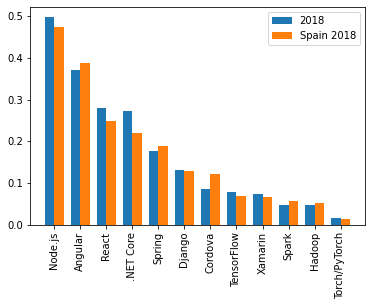

In [257]:
process_and_compare_col_global_local(df_2018, df_2018_es, "FrameworkWorkedWith", year=2018, country="Spain")

# Process 2019 Data

In [100]:
df_2019, df_2019_es, cols_intersect = process_yearly_data(so_survey_results_2019, 2019, 'Spain', cols_intersect)

processing data for year 2019 from ./data/developer_survey_2019/survey_results_public.csv
original data shape:  (88883, 85)
original data shape + year:  (88883, 86)
country specific data shape:  (1604, 86)
old column index:  ['Respondent', 'Country', 'FormalEducation', 'CompanySize', 'CareerSatisfaction', 'JobSatisfaction', 'LastNewJob', 'Currency', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'IDE', 'Methodology', 'VersionControl', 'CheckInCode', 'Gender', 'Salary', 'Year']
old columns index len:  18
new columns index len:  86
new column index:  ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWee

processing yearly data for year 2019 and DevType
null entries for DevType: 0
                                           catval  total_catvals
0                           Developer, full-stack          49770
1                             Developer, back-end          40665
2                            Developer, front-end          26649
3   Developer, desktop or enterprise applications          17316
4                               Developer, mobile          14698
5                                         Student          11921
6                          Database administrator           9520
7                                        Designer           9182
8                            System administrator           8929
9                               DevOps specialist           8862
10    Developer, embedded applications or devices           7248
11  Data scientist or machine learning specialist           6460
12                          Developer, QA or test           6359
13           

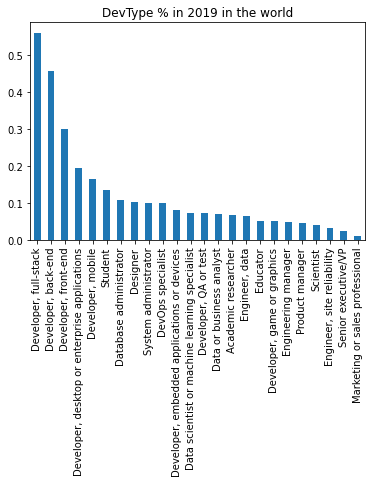

processing yearly data for year 2019 and DevType in Spain
null entries for DevType: 0
                                           catval  total_catvals
0                           Developer, full-stack            847
1                             Developer, back-end            729
2                            Developer, front-end            413
3                               Developer, mobile            305
4   Developer, desktop or enterprise applications            292
5                            System administrator            181
6                               DevOps specialist            158
7                                         Student            151
8                          Database administrator            150
9                                        Designer            147
10    Developer, embedded applications or devices            141
11  Data scientist or machine learning specialist            131
12                            Academic researcher            129
13  

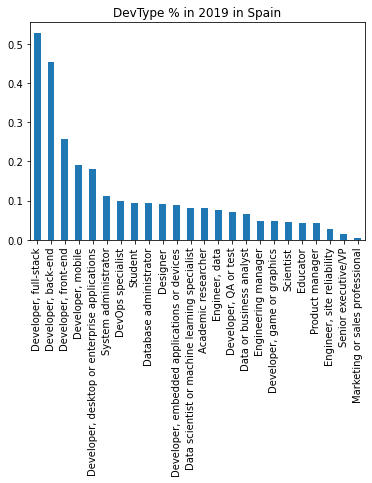

                                           catval      2019  Spain 2019  \
0                           Developer, full-stack  0.559950    0.528055   
1                             Developer, back-end  0.457512    0.454489   
2                            Developer, front-end  0.299821    0.257481   
3   Developer, desktop or enterprise applications  0.194818    0.190150   
4                               Developer, mobile  0.165363    0.182045   
5                                         Student  0.134120    0.112843   
6                          Database administrator  0.107107    0.098504   
7                                        Designer  0.103304    0.094140   
8                            System administrator  0.100458    0.093516   
9                               DevOps specialist  0.099704    0.091646   
10    Developer, embedded applications or devices  0.081545    0.087905   
11  Data scientist or machine learning specialist  0.072680    0.081671   
12                       

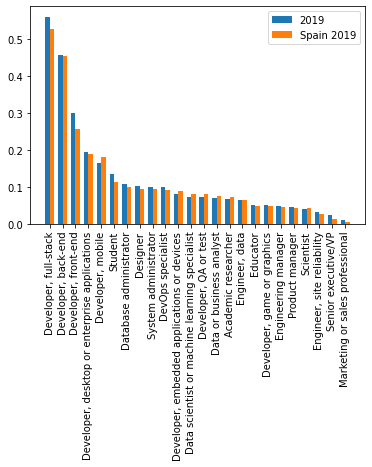

In [258]:
process_and_compare_col_global_local(df_2019, df_2019_es, "DevType", year=2019, country="Spain")

# Process 2020 Data

In [101]:
df_2020, df_2020_es, cols_intersect = process_yearly_data(so_survey_results_2020, 2020, 'Spain', cols_intersect)

processing data for year 2020 from ./data/developer_survey_2020/survey_results_public.csv
original data shape:  (64461, 61)
original data shape + year:  (64461, 62)
country specific data shape:  (1161, 62)
old column index:  ['Respondent', 'Country', 'Gender', 'Year']
old columns index len:  4
new columns index len:  62
new column index:  ['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'N

processing yearly data for year 2020 and DevType
null entries for DevType: 0
                                           catval  total_catvals
0                           Developer, full-stack          42216
1                             Developer, back-end          27228
2                            Developer, front-end          18296
3   Developer, desktop or enterprise applications          11784
4                               Developer, mobile           9482
5                               DevOps specialist           5969
6                          Database administrator           5722
7                                        Designer           5321
8                            System administrator           5242
9     Developer, embedded applications or devices           4750
10                       Data or business analyst           4024
11  Data scientist or machine learning specialist           3988
12                          Developer, QA or test           3947
13           

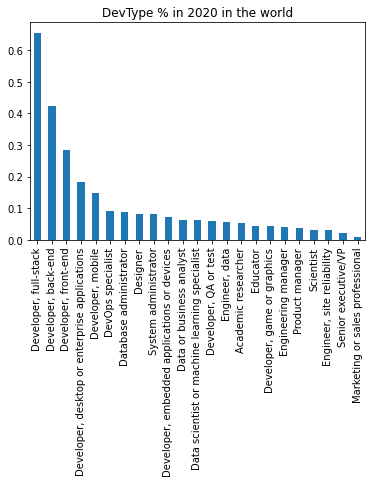

processing yearly data for year 2020 and DevType in Spain
null entries for DevType: 0
                                           catval  total_catvals
0                           Developer, full-stack            703
1                             Developer, back-end            522
2                            Developer, front-end            327
3   Developer, desktop or enterprise applications            204
4                               Developer, mobile            193
5                          Database administrator            112
6                            System administrator            105
7                               DevOps specialist             99
8                                        Designer             98
9     Developer, embedded applications or devices             90
10                                 Engineer, data             86
11                          Developer, QA or test             85
12  Data scientist or machine learning specialist             82
13  

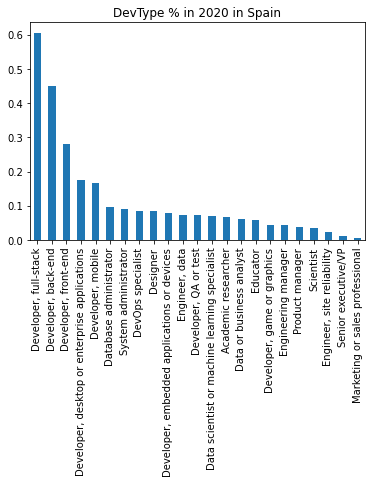

                                           catval      2020  Spain 2020  \
0                           Developer, full-stack  0.654908    0.605512   
1                             Developer, back-end  0.422395    0.449612   
2                            Developer, front-end  0.283831    0.281654   
3   Developer, desktop or enterprise applications  0.182808    0.175711   
4                               Developer, mobile  0.147097    0.166236   
5                               DevOps specialist  0.092599    0.096469   
6                          Database administrator  0.088767    0.090439   
7                                        Designer  0.082546    0.085271   
8                            System administrator  0.081320    0.084410   
9     Developer, embedded applications or devices  0.073688    0.077519   
10                       Data or business analyst  0.062425    0.074074   
11  Data scientist or machine learning specialist  0.061867    0.073213   
12                       

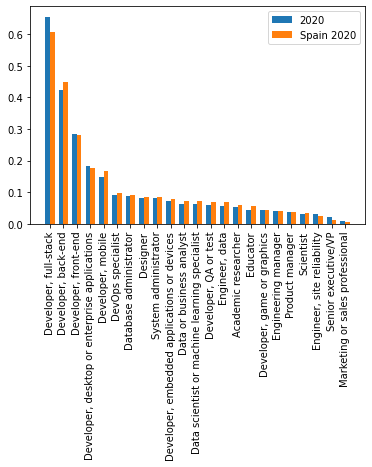

In [259]:
process_and_compare_col_global_local(df_2020, df_2020_es, "DevType", year=2020, country="Spain")

# Normalize data over past 4 years

In [102]:
#     'Respondent', //kept 2018, 2019, 2020
#     'Professional', // DevType partially 2018, 2019, 2020
#     'ProgramHobby', // Hobby partially 2018, Hobbyist 2019, 2020
#     'Country', //kept 2018, 2019, 2020
#     'EmploymentStatus', //Employment 2018, 2019, 2020
#     'FormalEducation', //kept 2018, EdLevel 2019, 2020
#     'MajorUndergrad', //UndergradMajor overlap 2018, 2019, 2020
#     'YearsProgram', // YearsCoding somehow 2018, YearsCode 2019, 2020
#     'YearsCodedJob', // YearsCodingProf 2018, YearsCodePro 2019, 2020
#     'YearsCodedJobPast', // YearsCodingProf 2018, YearsCodePro 2019, 2020
#     'DeveloperType', // DevType 2018, 2019, 2020
#     'JobSatisfaction', // kept 2018, JobSat 2019, 2020
#     'JobSeekingStatus', // JobSearchStatus 2018, JobSeek 2019, 2020
#     'AssessJobIndustry', // AssessJob1 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobDept', // AssessJob3 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobTech', // AssessJob4 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobCompensation', // AssessJob5 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobOffice', // AssessJob6 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobRemote', // AssessJob7 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobProfDevel', // AssessJob8 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobDiversity', // AssessJob9 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobProduct', // AssessJob10 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'ImportantBenefits', // AssessBenefits1 - 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'Currency', // kept 2018, CurrencySymbol and CurrencyDesc 2019, same 2020
#     'HaveWorkedLanguage', // LanguageWorkedWith 2018, 2019, 2020
#     'WantWorkLanguage', // LanguageDesireNextYear 2018, 2019, 2020
#     'HaveWorkedFramework', // FrameworkWorkedWith 2018, WebFrameWorkedWith 2019, 2020
#     'WantWorkFramework', // FrameworkDesireNextYear 2018, WebFrameDesireNextYear 2019, 2020
#     'HaveWorkedDatabase', // DatabaseWorkedWith 2018, 2019, 2020
#     'WantWorkDatabase', // DatabaseDesireNextYear 2018, 2019, 2020
#     'HaveWorkedPlatform', // PlatformWorkedWith 2018, 2019, 2020
#     'WantWorkPlatform', // PlatformDesireNextYear 2018, 2019, 2020
#     'StackOverflowCommunity', // StackOverflowConsiderMember 2018, SOComm 2019, 2020
#     'Gender', // kept 2018, 2019, 2020
#     'Race', // RaceEthnicity 2018, Ethnicity 2019, 2020
#     'SurveyLong', // SurveyTooLong partially 2018, SurveyLength 2019, 2020
#     'Salary', // kept 2018, CompTotal, CompFreq and/or ConvertedComp 2019, 2020
#     'Year' // kept 2018, 2019, 2020

# df_final = pd.DataFrame(columns=[])
# df_final.shape

In [103]:
print(df_2017_es.shape)
# only keep entries that have a salary as that is what we want to track
df_2017_es_reduced = df_2017_es.dropna(subset=["Salary"], axis=0)
df_2017_es_reduced.shape

(864, 156)


(278, 156)

In [104]:
# check available currencies and normalize the data
df_2017_es_reduced.Currency.value_counts()

Euros (€)                      276
U.S. dollars ($)                 1
British pounds sterling (£)      1
Name: Currency, dtype: int64

In [105]:
df_2017_es_reduced.isnull()['Currency'].mean()

0.0

In [107]:
df_2017_es['Salary_EUR'] = None

# convert non euro salaries to euros. conversion rates USD -> EURO 0,84 ; GBP -> EURO 1,08 for 13.09.2020
def convert_salary(row):
    # print(f"currency:|{row['Currency']}|")
    if row['Currency'] == "Euros (€)":
        return row["Salary"]
    elif row['Currency'] == "U.S. dollars ($)":
        return row["Salary"] * 0.84
    elif row['Currency'] == "British pounds sterling (£)":
        return row["Salary"] * 1.08
    else: # unknown currency
        return None

df_2017_es_reduced['final_Salary_EUR'] = df_2017_es_reduced.apply(lambda row: convert_salary(row), axis=1)

/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [108]:
df_2017_es_reduced.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,Year,Salary_EUR,final_Salary_EUR
count,278.000000,277.000000,276.000000,131.000000,248.000000,278.000000,0.0,278.0,278.000000,278.000000
mean,26787.611511,7.454874,6.942029,2.748092,8.854839,33563.796705,NaN,2017.0,33544.947784,33544.947784
std,15377.427143,1.611424,2.019066,6.123528,1.050880,16435.043075,NaN,0.0,16412.373925,16412.373925
min,70.000000,0.000000,0.000000,0.000000,4.000000,731.182796,NaN,2017.0,731.182796,731.182796
25%,12537.250000,7.000000,6.000000,1.000000,8.000000,23118.279570,NaN,2017.0,23118.279570,23118.279570
50%,28645.500000,8.000000,7.000000,1.000000,9.000000,32258.064516,NaN,2017.0,32258.064516,32258.064516
75%,40628.250000,8.000000,8.000000,3.000000,10.000000,38709.677419,NaN,2017.0,38709.677419,38709.677419
max,51052.000000,10.000000,10.000000,40.000000,10.000000,134803.225806,NaN,2017.0,134803.225806,134803.225806


In [109]:
df_2017_es_reduced['Professional'].value_counts()

Professional developer    278
Name: Professional, dtype: int64

In [110]:
# it is safe to drop the Professional column as it has only one value for this subset of data
df_2017_es_reduced = df_2017_es_reduced.drop('Professional', axis=1)

In [83]:
df_merged_es = df_2017_es[[]].copy()

# Spain - Case Study

## 1. Evolution of salary over past 5 years in Spain

## 2. Salary predictions for the 2 years in Spain

## 3. Development language impact on salary

## 4. What kind of development work is being done in Spain

## 5. Important development centers in Spain